# SIR + SEIR - Epidemics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

# SIR: new cases

In [2]:
def sir_model(y, t, beta, gamma, N):
    S, I, R = y # current counts of suceptible, infected, recovered
    dSdt = -beta * S * I / N # change of suceptible wrt change in time
    dIdt = beta * S * I / N - gamma * I # change of infected wrt change in time
    dRdt = gamma * I # change in recovered wrt change in time
    return dSdt, dIdt, dRdt # return change of states

In [3]:
def simulate_sir(S0, I0, R0, t, beta, gamma, N):
    '''
    INPUT:
    S0, I0, R0 = The initial counts of susceptible, infected, and recovered individuals.
    t = An array or list of time points at which to evaluate the model
    beta = transmision rate of disease
    gamma = recovery rate of disease
    N = population
    OUTPUT:
    result = array where each row corresponds to a time point and the columns represent the values of S, I, and R respectively
    '''
    y0 = (S0, I0, R0) 
    result = odeint(sir_model, y0, t, args=(beta, gamma, N)) # use odeint to solve the differential equations defined in sir_model
    # derivate at each t in the time_vector to give the paths of S,I,R
    S, I, R = result.T
    return S, I, R

In [4]:
data = pd.read_csv('../Data/silver/zika.csv')  # Replace with your data
t_data = np.arange(1, len(data)+1)
I_data = data['Casos'].values
N = 50_000_000  # Replace with the actual population size

In [5]:
# initial conditions
I0 = I_data[0] # infected
S0 = N - I0 # suceptible
R0 = 0 # recovered / death

In [6]:
# fit function
def fit_function(t, beta, gamma):
    S, I, R = simulate_sir(S0, I0, R0, t, beta, gamma, N)
    return I

In [7]:
beta_guess = 0.5  # Initial guess for transmission rate
gamma_guess = 0.3  # Initial guess for recovery rate
initial_guess = [beta_guess, gamma_guess]

popt, pcov = curve_fit(fit_function, t_data, I_data, p0=initial_guess)
beta_opt, gamma_opt = popt

In [8]:
t_sim = np.linspace(0, t_data[-1], 100)  # Time points for simulation
S_opt, I_opt, R_opt = simulate_sir(S0, I0, R0, t_sim, beta_opt, gamma_opt, N)

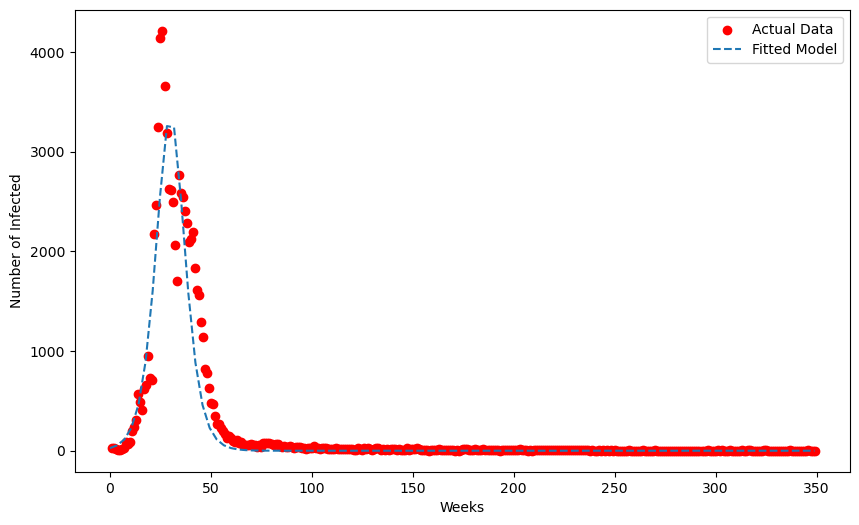

Optimized beta: 18.059333090129005
Optimized gamma: 17.851190890969352
Basic Reproduction Number R0: 1.0116598494986095


In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(t_data, I_data, label='Actual Data', color='red')
plt.plot(t_sim, I_opt, label='Fitted Model', linestyle='dashed')
plt.xlabel('Weeks')
plt.ylabel('Number of Infected')
plt.legend()
plt.show()

print(f"Optimized beta: {beta_opt}")
print(f"Optimized gamma: {gamma_opt}")
print(f"Basic Reproduction Number R0: {beta_opt / gamma_opt}")

# SIR Cumulative

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

# Define SIR equations
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Simulate and return cumulative cases
def simulate_sir(S0, I0, R0, t, beta, gamma, N):
    y0 = (S0, I0, R0)
    result = odeint(sir_model, y0, t, args=(beta, gamma, N))
    S, I, R = result.T
    cumulative = N - S  # Cumulative cases = N - S(t)
    return cumulative, I, R

In [11]:
# Load data
C_data = np.cumsum(I_data)  # Cumulative cases
N = 1e6  # Total population (adjust to your dataset)

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0 = C_data[0]
R0 = 0
S0 = N - I0 - R0

In [12]:
def fit_function(t, beta, gamma):
    cumulative, _, _ = simulate_sir(S0, I0, R0, t, beta, gamma, N)
    return cumulative

Experiment

In [13]:
# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
initial_guess = [beta_guess, gamma_guess]

# Fit the model
popt, pcov = curve_fit(fit_function, t_data, C_data, p0=initial_guess)
beta_opt, gamma_opt = popt

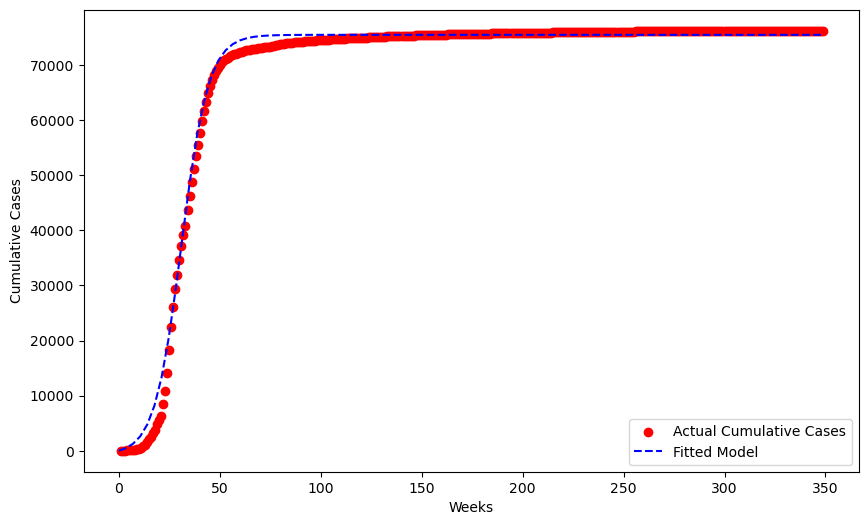

Optimized beta: 3.9524
Optimized gamma: 3.8027
Basic Reproduction Number R0: 1.0394


In [14]:
# Simulate with optimized parameters
t_sim = np.linspace(0, t_data[-1], 100)
cumulative_opt, I_opt, R_opt = simulate_sir(S0, I0, R0, t_sim, beta_opt, gamma_opt, N)

# Plot cumulative cases
plt.figure(figsize=(10, 6))
plt.scatter(t_data, C_data, label='Actual Cumulative Cases', color='red')
plt.plot(t_sim, cumulative_opt, label='Fitted Model', linestyle='--', color='blue')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Basic Reproduction Number R0: {beta_opt / gamma_opt:.4f}")

## ZIKA

In [15]:
data = pd.read_csv('../Data/silver/zika.csv')  # Replace with your data
t_data = np.arange(1, len(data)+1)
I_data = data['Casos'].values
N = 50_327_000  # Replace with the actual population size

# Load data
C_data = np.cumsum(I_data)  # Cumulative cases

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0 = C_data[0]
R0 = 0
S0 = N - I0 - R0

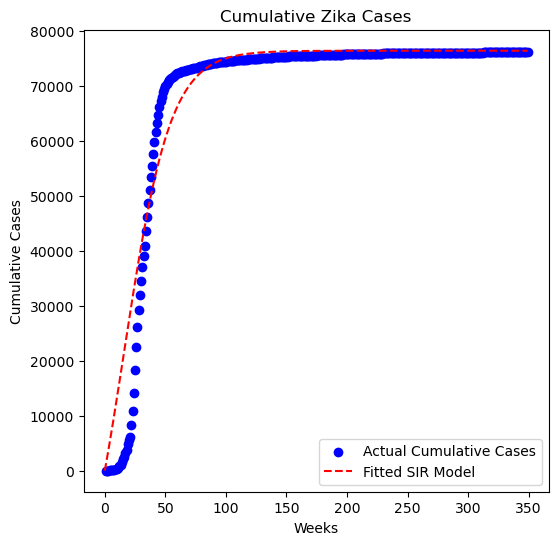

Optimized beta: 46.9921
Optimized gamma: 46.9724
Basic Reproduction Number R0: 1.0004


In [16]:
# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
initial_guess = [beta_guess, gamma_guess]

# Fit the model
popt, pcov = curve_fit(fit_function, t_data, C_data, p0=initial_guess)
beta_opt, gamma_opt = popt

# get plots
# Simulate with optimized parameters
t_sim = np.linspace(0, t_data[-1], t_data[-1])
cumulative_opt_z, I_opt_z, R_opt_z = simulate_sir(S0, I0, R0, t_sim, beta_opt, gamma_opt, N)

# Plot cumulative cases
plt.figure(figsize=(6, 6))
plt.scatter(t_data, C_data, label='Actual Cumulative Cases', color='blue')
plt.plot(t_sim, cumulative_opt_z, label='Fitted SIR Model', linestyle='--', color='red')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Zika Cases')
plt.legend()
plt.savefig('../plots/sir_zika.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Basic Reproduction Number R0: {beta_opt / gamma_opt:.4f}")

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
evaluation_metrics = {}
C_data_z = C_data.copy()
# Compute RMSE
rmse = np.sqrt(mean_squared_error(C_data_z, cumulative_opt_z))
# Compute R^2 Score
r2 = r2_score(C_data_z, cumulative_opt_z)

# Store results
evaluation_metrics['Zika'] = {'RMSE': rmse, 'R2': r2}

## Dengue

In [19]:
data = pd.read_csv('../Data/silver/dengue_no_split.csv')  # Replace with your data
t_data = np.arange(1, len(data)+1)
I_data = data['Casos'].values
N = 50_327_000  # Replace with the actual population size

# Load data
C_data = np.cumsum(I_data)  # Cumulative cases

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0 = C_data[0]
R0 = 0
S0 = N - I0 - R0

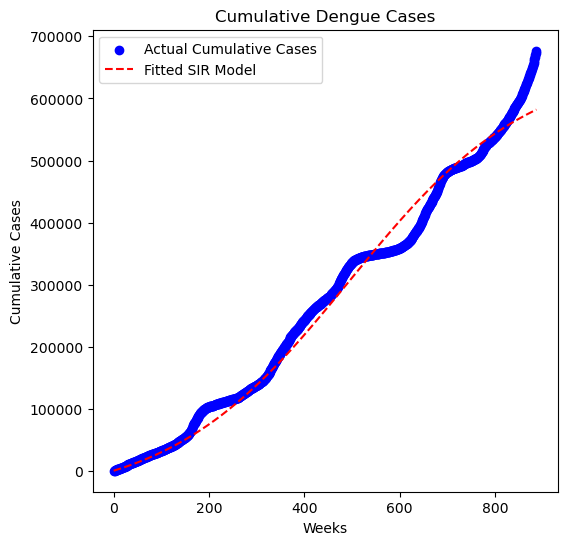

Optimized beta: 0.7512
Optimized gamma: 0.7466
Basic Reproduction Number R0: 1.0062


In [20]:
# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
initial_guess = [beta_guess, gamma_guess]

# Fit the model
popt, pcov = curve_fit(fit_function, t_data, C_data, p0=initial_guess)
beta_opt, gamma_opt = popt

# get plots
# Simulate with optimized parameters
t_sim = np.linspace(0, t_data[-1], t_data[-1])
cumulative_opt_d, I_opt_d, R_opt_d = simulate_sir(S0, I0, R0, t_sim, beta_opt, gamma_opt, N)

# Plot cumulative cases
plt.figure(figsize=(6, 6))
plt.scatter(t_data, C_data, label='Actual Cumulative Cases', color='blue')
plt.plot(t_sim, cumulative_opt_d, label='Fitted SIR Model', linestyle='--', color='red')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Dengue Cases')
plt.legend()
plt.savefig('../plots/sir_dengue.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Basic Reproduction Number R0: {beta_opt / gamma_opt:.4f}")

In [21]:
C_data_d = C_data.copy()
# Compute RMSE
rmse = np.sqrt(mean_squared_error(C_data_d, cumulative_opt_d))
# Compute R^2 Score
r2 = r2_score(C_data_d, cumulative_opt_d)

# Store results
evaluation_metrics['Dengue'] = {'RMSE': rmse, 'R2': r2}

## Chicunguya

In [22]:
data = pd.read_csv('../Data/silver/chicunguya.csv')  # Replace with your data
t_data = np.arange(1, len(data)+1)
I_data = data['Casos'].values
N = 50_327_000  # Replace with the actual population size

# Load data
C_data = np.cumsum(I_data)  # Cumulative cases

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0 = C_data[0]
R0 = 0
S0 = N - I0 - R0

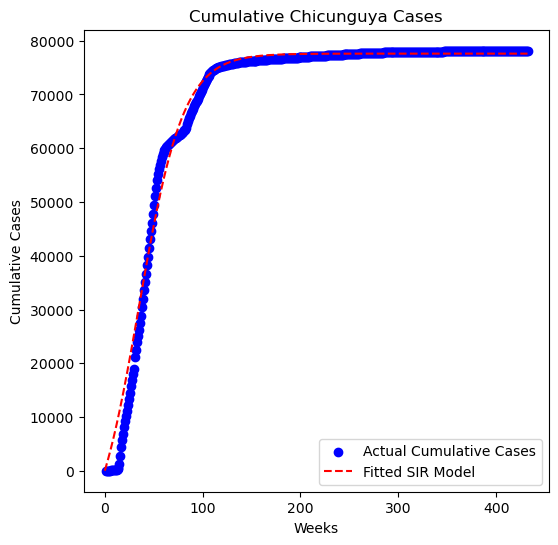

Optimized beta: 46.7740
Optimized gamma: 46.7457
Basic Reproduction Number R0: 1.0006


In [23]:
# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
initial_guess = [beta_guess, gamma_guess]

# Fit the model
popt, pcov = curve_fit(fit_function, t_data, C_data, p0=initial_guess)
beta_opt, gamma_opt = popt

# get plots
# Simulate with optimized parameters
t_sim = np.linspace(0, t_data[-1], t_data[-1])
cumulative_opt_c, I_opt_c, R_opt_c = simulate_sir(S0, I0, R0, t_sim, beta_opt, gamma_opt, N)

# Plot cumulative cases
plt.figure(figsize=(6, 6))
plt.scatter(t_data, C_data, label='Actual Cumulative Cases', color='blue')
plt.plot(t_sim, cumulative_opt_c, label='Fitted SIR Model', linestyle='--', color='red')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Chicunguya Cases')
plt.legend()
plt.savefig('../plots/sir_chicunguya.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Basic Reproduction Number R0: {beta_opt / gamma_opt:.4f}")

In [24]:
C_data_c = C_data.copy()
# Compute RMSE
rmse = np.sqrt(mean_squared_error(C_data_c, cumulative_opt_c))
# Compute R^2 Score
r2 = r2_score(C_data_c, cumulative_opt_c)

# Store results
evaluation_metrics['Chicunguya'] = {'RMSE': rmse, 'R2': r2}

In [25]:
df_metrics_sir = pd.DataFrame.from_dict(evaluation_metrics, orient = 'index').reset_index()
df_metrics_sir.columns = ['epidemic', 'rmse', 'r2']
df_metrics_sir

,epidemic,rmse,r2
0,Zika,4703.626030,0.942244
1,Dengue,22520.654823,0.985723
2,Chicunguya,2148.462321,0.988437


# SEIR

**Definition of SEIR**
Model has:
* *S* Suceptible individuals
* *E* exposed individuals (not yet infectious)
* *I* infectious* individuals
* *R* recovered individuals

Model is described by set of differential equations:

$$
\begin{aligned}
\dot{S} &= -\beta \frac{SI}{N} \\
\dot{E} &= \beta \frac{SI}{N} - \sigma E \\
\dot{I} &= \sigma E  - \gamma I \\
\dot{R} &=  \gamma I
\end{aligned}
$$

With:
* $\beta$ transmision rate
* $\sigma$ incubation rate (1/inucbation period)
* $\gamma$ recovery rate (1/infectious period )
* *N* total popualtion

In [26]:
# Define SEIR equations
def seir_model(y, t, beta, gamma, sigma, N):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# Simulate and return cumulative cases
def simulate_seir(S0, E0, I0, R0, t, beta, gamma, sigma, N):
    y0 = (S0, E0, I0, R0)
    result = odeint(seir_model, y0, t, args=(beta, gamma, sigma, N))
    S, E, I, R = result.T
    cumulative = N - S  # Cumulative cases = N - S(t)
    return cumulative, I, R

# Fit function for curve_fit; extra parameters are passed in via a lambda below.
def fit_function_seir(t, beta, gamma, sigma, N, S0, E0, I0, R0):
    cumulative, _, _ = simulate_seir(S0, E0, I0, R0, t, beta, gamma, sigma, N)
    return cumulative

In [27]:
df_zika = pd.read_csv('../Data/silver/zika.csv') 
df_dengue = pd.read_csv('../Data/silver/dengue_no_split.csv') 
df_chic = pd.read_csv('../Data/silver/chicunguya.csv') 

In [28]:
evaluation_metrics_seir = {}

### Zika

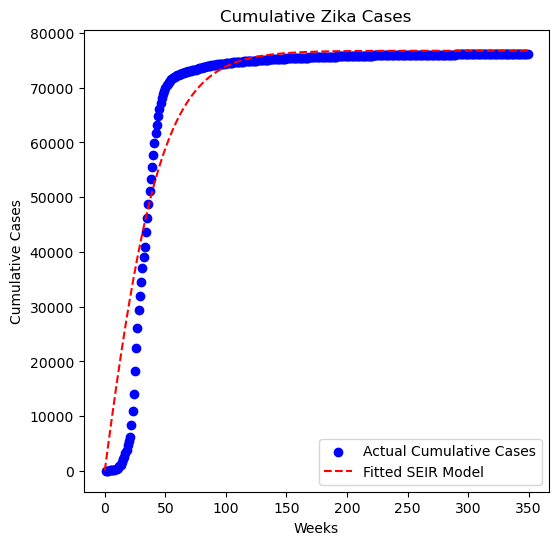

Optimized beta: 21.5462
Optimized gamma: 21.5516
Optimized sigma: 9662.6936


In [29]:
# Load data
df_zika = pd.read_csv('../Data/silver/zika.csv') 
t_data_z = np.arange(1, len(df_zika) + 1)
I_data_z = df_zika['Casos'].values
N = 50_327_000  # Replace with the actual population size

# Cumulative cases from data
C_data_z = np.cumsum(I_data_z)

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0_z = C_data_z[0]
E0_z = I0_z * 2
R0_z = 0
S0_z = N - I0_z - R0_z - E0_z

# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
sigma_guess = 1    # Incubation rate
initial_guess = [beta_guess, gamma_guess, sigma_guess]

# Fit the model using a lambda to include extra parameters
popt, pcov = curve_fit(
    lambda t, beta, gamma, sigma: fit_function_seir(t, beta, gamma, sigma, N, S0_z, E0_z, I0_z, R0_z),
    t_data_z,
    C_data_z,
    p0=initial_guess
    
)
beta_opt, gamma_opt, sigma_opt = popt

# Simulate with optimized parameters
t_sim = np.linspace(0, t_data_z[-1], t_data_z[-1])
cumulative_opt_z, I_opt_z, R_opt_z = simulate_seir(S0_z, E0_z, I0_z, R0_z, t_sim, beta_opt, gamma_opt, sigma_opt, N)



# Compute RMSE
rmse_z = np.sqrt(mean_squared_error(C_data_z, cumulative_opt_z))
# Compute R^2 Score
r2_z = r2_score(C_data_z, cumulative_opt_z)

# Store results
evaluation_metrics_seir['Zika'] = {'RMSE': rmse_z, 'R2': r2_z}


# Plot cumulative cases
plt.figure(figsize=(6, 6))
plt.scatter(t_data_z, C_data_z, label='Actual Cumulative Cases', color='blue')
plt.plot(t_sim, cumulative_opt_z, label='Fitted SEIR Model', linestyle='--', color='red')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Zika Cases')
plt.legend()
plt.savefig('../plots/seir_zika.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Optimized sigma: {sigma_opt:.4f}")

### Dengue

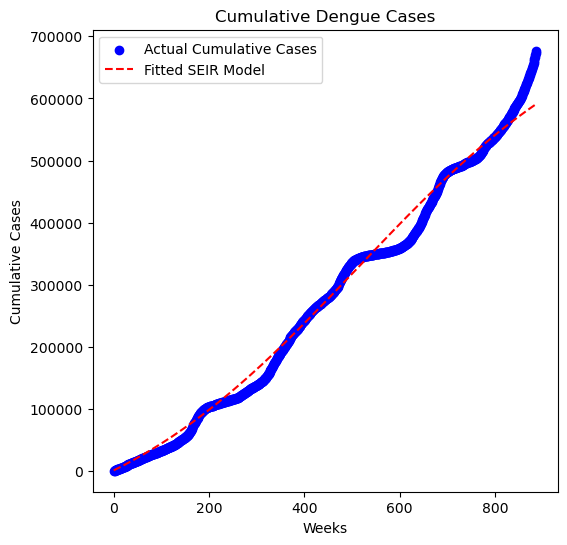

Optimized beta: 0.4933
Optimized gamma: 0.4901
Optimized sigma: 2.2094


In [30]:
# Load data
df_dengue = pd.read_csv('../Data/silver/dengue_no_split.csv') 
t_data_d = np.arange(1, len(df_dengue) + 1)
I_data_d = df_dengue['Casos'].values
N = 50_327_000  # Replace with the actual population size

# Cumulative cases from data
C_data_d = np.cumsum(I_data_d)

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0_d = C_data_d[0]
E0_d = I0_d * 2
R0_d = 0
S0_d = N - I0_d - R0_d - E0_d

# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
sigma_guess = 1    # Incubation rate
initial_guess = [beta_guess, gamma_guess, sigma_guess]

# Fit the model using a lambda to include extra parameters
popt, pcov = curve_fit(
    lambda t, beta, gamma, sigma: fit_function_seir(t, beta, gamma, sigma, N, S0_d, E0_d, I0_d, R0_d),
    t_data_d,
    C_data_d,
    p0=initial_guess,
    bounds=([0, 0, 0], [10, 10, 10])
)
beta_opt, gamma_opt, sigma_opt = popt

# Simulate with optimized parameters
t_sim = np.linspace(0, t_data_d[-1], t_data_d[-1])
cumulative_opt_d, I_opt_d, R_opt_d = simulate_seir(S0_d, E0_d, I0_d, R0_d, t_sim, beta_opt, gamma_opt, sigma_opt, N)



# Compute RMSE
rmse_d = np.sqrt(mean_squared_error(C_data_d, cumulative_opt_d))
# Compute R^2 Score
r2_d = r2_score(C_data_d, cumulative_opt_d)

# Store results
evaluation_metrics_seir['Dengue'] = {'RMSE': rmse_d, 'R2': r2_d}


# Plot cumulative cases
plt.figure(figsize=(6, 6))
plt.scatter(t_data_d, C_data_d, label='Actual Cumulative Cases', color='blue')
plt.plot(t_sim, cumulative_opt_d, label='Fitted SEIR Model', linestyle='--', color='red')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Dengue Cases')
plt.legend()
plt.savefig('../plots/seir_dengue.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Optimized sigma: {sigma_opt:.4f}")

 ### Chicunguya

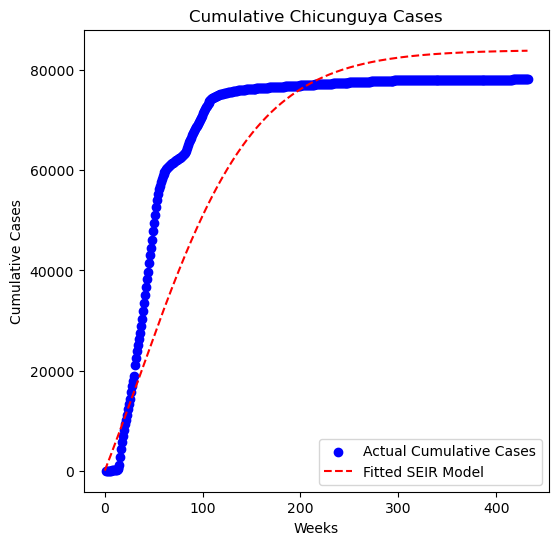

Optimized beta: 17.6369
Optimized gamma: 17.6304
Optimized sigma: 47.3017


In [31]:
# Load data
df_chic = pd.read_csv('../Data/silver/chicunguya.csv') 
t_data_c = np.arange(1, len(df_chic) + 1)
I_data_c = df_chic['Casos'].values
N = 50_327_000  # Replace with the actual population size

# Cumulative cases from data
C_data_c = np.cumsum(I_data_c)

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0_c = C_data_c[0]
E0_c = I0_c * 2
R0_c = 0
S0_c = N - I0_c - R0_c - E0_c

# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
sigma_guess = 1    # Incubation rate
initial_guess = [beta_guess, gamma_guess, sigma_guess]

# Fit the model using a lambda to include extra parameters
popt, pcov = curve_fit(
    lambda t, beta, gamma, sigma: fit_function_seir(t, beta, gamma, sigma, N, S0_c, E0_c, I0_c, R0_c),
    t_data_c,
    C_data_c,
    p0=initial_guess
)
beta_opt, gamma_opt, sigma_opt = popt

# Simulate with optimized parameters
t_sim = np.linspace(0, t_data_c[-1], t_data_c[-1])
cumulative_opt_c, I_opt_c, R_opt_c = simulate_seir(S0_c, E0_c, I0_c, R0_c, t_sim, beta_opt, gamma_opt, sigma_opt, N)



# Compute RMSE
rmse_c = np.sqrt(mean_squared_error(C_data_c, cumulative_opt_c))
# Compute R^2 Score
r2_c = r2_score(C_data_c, cumulative_opt_c)

# Store results
evaluation_metrics_seir['Chicunguya'] = {'RMSE': rmse_c, 'R2': r2_c}


# Plot cumulative cases
plt.figure(figsize=(6, 6))
plt.scatter(t_data_c, C_data_c, label='Actual Cumulative Cases', color='blue')
plt.plot(t_sim, cumulative_opt_c, label='Fitted SEIR Model', linestyle='--', color='red')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative Chicunguya Cases')
plt.legend()
plt.savefig('../plots/seir_chicunguya.png', dpi=300, bbox_inches='tight')
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Optimized sigma: {sigma_opt:.4f}")

**Optimized Coefficients Interpretation**

We have the following optimized parameters for the SEIR model (with data in weekly periodicity):

- $\beta = 17.6369$ (transmission rate)
- $\gamma = 17.6304$ (recovery rate)
- $\sigma = 47.3017$ (incubation rate)

**Interpretation**

**Transmission Rate** $\beta$
- The transmission rate $\beta = 17.6369$ per week indicates that, in a completely susceptible population, each infectious individual is expected to generate about **17.64 effective contacts per week** that could potentially lead to new infections.
- In other words, each infectious person could, on average, expose 17.64 susceptible individuals in one week.

**Recovery Rate** $\gamma$
- The recovery rate $\gamma = 17.6304$ per week implies an average infectious period of:
  $$
  \text{Average infectious period} = \frac{1}{\gamma} \approx \frac{1}{17.6304} \approx 0.0567 \text{ weeks.}
  $$
- Converting this into days (assuming 1 week approx 7 days):
  $$
  0.0567 \times 7 \approx 0.397 \text{ days} \quad (\text{approximately 9.5 hours}).
  $$
- This suggests that individuals recover very quickly.

**Incubation Rate** $\sigma$
- The incubation rate $\sigma = 47.3017$ per week indicates an average latent period (the time from exposure to becoming infectious) of:
  $$
  \text{Average latent period} = \frac{1}{\sigma} \approx \frac{1}{47.3017} \approx 0.0211 \text{ weeks.}
  $$
- In days, this is:
  $$
  0.0211 \times 7 \approx 0.1477 \text{ days} \quad (\text{approximately 3.5 hours}).
  $$
- This is an extremely rapid progression from exposure to infectiousness.

**Basic Reproduction Number** $R_0$
- A rough estimate for the basic reproduction number in a SEIR model is given by:
  $$
  R_0 \approx \frac{\beta}{\gamma}.
  $$
- With our values, we have:
  $$
  R_0 \approx \frac{17.6369}{17.6304} \approx 1.0004.
  $$
- An $R_0$ around 1 suggests that each infectious individual infects approximately one other person, which is just at the threshold for sustaining an outbreak.



- **Biological Plausibility:**  
  The extremely short latent and infectious periods may not be realistic for many diseases. Such rapid progression (from exposure to recovery in a matter of hours) is unusual. It is important to revisit the data, time scaling, and model assumptions to verify these rates. / Spread trough mosquitos.

- **Model Fit:**  
  Although the parameters might mathematically optimize the fit to the data, they might not capture the underlying biology properly. Consider imposing bounds on the parameters or re-assessing the initial guesses.

- **Data Aggregation:**  
  Since the data is aggregated on a weekly basis, sub-week dynamics are not captured. This might force the model to adopt very high rates to compensate for the aggregation, resulting in these high values for $\beta$, $\gamma$, and $\sigma$.


In [32]:
df_metrics_seir = pd.DataFrame.from_dict(evaluation_metrics_seir, orient = 'index').reset_index()
df_metrics_seir.columns = ['epidemic', 'rmse', 'r2']
df_metrics_seir

,epidemic,rmse,r2
0,Zika,5610.917102,0.917814
1,Dengue,18974.986979,0.989865
2,Chicunguya,10896.633939,0.702548
